In [301]:
import numpy as np
import matplotlib.pyplot as plt

In [302]:
n0=1
k=1.381e-23
T0=0
m0=4*1.66054e-27
m=9.11e-31
E=1e-21*n0
q=1.602e-19

In [303]:
n=1000
B=np.zeros((n,1))
A=np.zeros((n,n))

v=np.logspace(-5,np.log10(np.sqrt(24*1.602e-19/m)),n)
v=np.reshape(v,(n,1))
dv=v*((np.sqrt(24*1.602e-19/m)/1e-10)**(1/(n-1))-1)
'''
v=np.arange(1,1001)
v=np.reshape(v,(n,1))
dv=np.ones(n)
'''

'\nv=np.arange(1,1001)\nv=np.reshape(v,(n,1))\ndv=np.ones(n)\n'

In [304]:
np.shape(v)

(1000, 1)

In [305]:
def vm(v):
    return 5e-20*n0*np.sqrt(2/m*1.6e-19)
def dvm(v):
    return 0

In [306]:
def a(v):
    return k*T0*vm(v)/m0 + q**2*E**2/(3*vm(v))
def b(v):
    return v**3*vm(v)*m/(m0*v**2) + 2*v*q**2*E**2/(m*vm(v))/(3*m*v**2)#(k*T0*(2*v*vm(v)+v**2*dvm(v))/m + v**3*vm(v))*m/(m0*v**2) -q*E*(v**2*q*E*dvm(v)/(m*vm(v)**2) - 2*v*q*E/(m*vm(v)))/(3*m*v**2)
def c(v):
    return m*((2*v*vm(v)+v**2*dvm(v))*v + v**2*vm(v))/(m0*v**2)

In [307]:
def alpha(i):
    return a(v[i])/dv[i]**2
def beta(i):
    return -(2*a(v[i])/dv[i]**2+b(v[i])/dv[i])
def gamma(i):
    return a(v[i])/dv[i]**2+b(v[i])/dv[i]+c(v[i])

In [308]:
B[0,0]=1
B[1,0]=1

A[0,0]=1
A[1,1]=1
for i in range(2,n-1):
    A[i,i-2]=alpha(i)
    A[i,i-1]=beta(i)
    A[i,i]=gamma(i)
A[n-1,n-1]=1    
print(A)    

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.77170282e-54  -1.63587328e+05   1.63587328e+05 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.23047271e-16
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -1.10611479e-16
    1.22804634e-16   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]


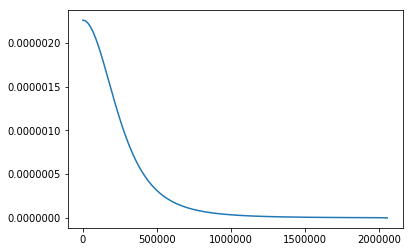

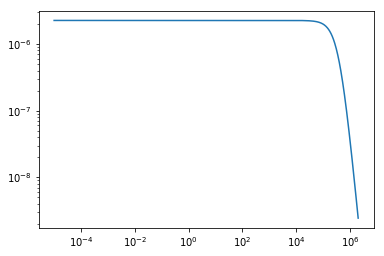

In [309]:
f0=np.matmul(np.linalg.inv(A),B)
f0=f0/np.sum(f0*dv) #Normalising f0
plt.plot(v,f0)
plt.show()
plt.loglog(v,f0)
plt.show()

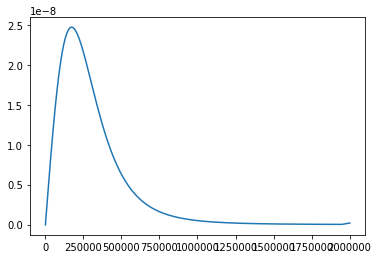

In [310]:
f1=-q*E*(f0[1:]-f0[:n-1])/dv[:n-1]/(m*vm(v[:n-1]))
plt.plot(v[:n-1],f1)
plt.show()

In [311]:
W=np.sum(dv[:n-1]*f1[:n-1]*v[:n-1]*2/3)

In [312]:
eps=np.sum(0.5*m*v**2*f0*dv)

In [313]:
np.sum(f1*dv[:n-1])

0.013395203867189176

In [314]:
print(W/1e4,eps/1.6e-19)

0.265746434659 0.311625645834


In [315]:
W0=0.593e4
eps0=0.7291*1.6e-19

In [316]:
vm(v[:n-1])

2.9633694887195528e-14

3986.1965198908142